sepal_length  sepal_width  ...    species  species_id
0             5.1          3.5  ...     setosa           1
1             4.9          3.0  ...     setosa           1
2             4.7          3.2  ...     setosa           1
3             4.6          3.1  ...     setosa           1
4             5.0          3.6  ...     setosa           1
..            ...          ...  ...        ...         ...
145           6.7          3.0  ...  virginica           3
146           6.3          2.5  ...  virginica           3
147           6.5          3.0  ...  virginica           3
148           6.2          3.4  ...  virginica           3
149           5.9          3.0  ...  virginica           3

[150 rows x 6 columns]

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


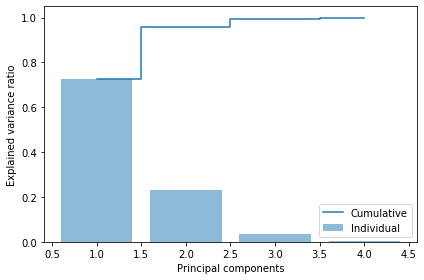

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


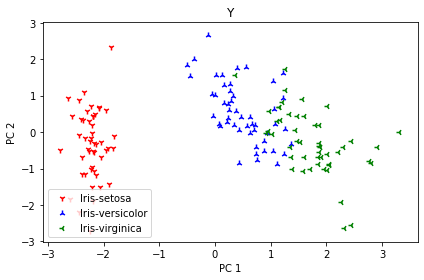

In [27]:
import pandas as pd

df = pd.read_csv(filepath_or_buffer="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
header = None, sep = ",")

df.columns=["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]

df.dropna(how="all", inplace=True)

df.head()

X = df.iloc[:, 0 : 4 ].values
y = df.iloc[:, 4 ].values

X
y

import plotly.express as px
df = px.data.iris()
display(df)
fig = px.scatter_matrix(df, dimensions=[ "sepal_width" , "sepal_length" ,
"petal_width" , "petal_length" ],
color= "species" )
fig.show()

from sklearn.preprocessing import StandardScaler
#X_std = StandardScaler().fit_transform(X)

import numpy as np
mean_vec = np.mean(X_std, axis= 0 )
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[ 0 ] -1 )

print ( 'Covariance matrix \n%s' %cov_mat)

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print ( 'Eigenvectors \n%s' %eig_vecs)
print ( '\nEigenvalues \n%s' %eig_vals)


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np. abs (eig_vals[i]), eig_vecs[:,i]) for i in range ( len (eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print ( 'Eigenvalues in descending order:' )
for i in eig_pairs:
    print (i[ 0 ])

import matplotlib.pyplot as plt
tot = sum (np. abs (eig_vals))
var_exp = [(i / tot) for i in sorted (np. abs (eig_vals), reverse= True )]
cum_var_exp = np.cumsum(var_exp)
plt.bar( range ( 1 , eig_vals.size + 1 ), var_exp, alpha= 0.5 , align= 'center' ,
label= 'Individual' )
plt.step( range ( 1 , eig_vals.size + 1 ), cum_var_exp, where= 'mid' ,
label= 'Cumulative' )
plt.ylabel( 'Explained variance ratio' )
plt.xlabel( 'Principal components' )
plt.legend(loc= 'best' )
plt.tight_layout()
plt.savefig( './fig-pca-var-exp.png' , dpi= 300 )
plt.show()

matrix_w = np.hstack((eig_pairs[ 0 ][ 1 ].reshape( 4 , 1 ),
eig_pairs[ 1 ][ 1 ].reshape( 4 , 1 )))
print ( 'Matrix W:\n' , matrix_w)


Y = X_std.dot(matrix_w)
#Plot the result
colors = [ 'r' , 'b' , 'g' ]
markers = [ '1' , '2' , '3' ]
for l, c, m in zip (np.unique(y), colors, markers):
    plt.scatter(Y[y==l, 0 ],
    Y[y==l, 1 ],
    c=c, label=l, marker=m)
plt.title( 'Y' )
plt.xlabel( 'PC 1' )
plt.ylabel( 'PC 2' )
#plt.legend(loc= 'lower left' )
plt.tight_layout()
plt.savefig( './fig-pca-z.png' , dpi= 300 )
plt.show()